### [MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv](https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data)
Columns: 
- __month__: The month in which subway trains delayed is being calculated (yyyy-mm-dd).
- __division__: The A Division (numbered subway lines), B Division (lettered subway lines) and systemwide.
- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, J, Z, L, N, Q, R, W, S 42nd, S Rock, S Fkln).
- __day_type__: Represents weekday as 1 and weekend as 2.
- __reporting_category__: The six categories that delays are reported under: Infrastructure & equipment, Crew availability, Police & medical, External Factors, Operating conditions, Planned ROW work. 
- __subcategory__: The sub-categories that fall under the definition of Delays: Braking; Door-Related; Fire, Smoke, Debris; Inclement Weather; Crew Availability; Insufficient Supplement Schedule; Propulsion; Public Conduct, Crime, Police Response; Rail and Roadbed; Persons on Roadbed; Service Delivery; Sick/Injured Customer; Train Brake Activation - Cause Unknown; Subways Maintenance; Work Equipment; Capital Work - Other Planned ROW; External Debris on Roadbed; External Agency or Utility; Capital Work - Other Planned ROW; Other – CE; Other – Sig; Other Infrastructure; Other Internal Disruptions.
- __delays__: The number of train delays per category and time period.

### [MTA Subway Customer Journey-Focused Metrics: Beginning 2020](https://data.ny.gov/Transportation/MTA-Subway-Customer-Journey-Focused-Metrics-Beginn/4apg-4kt9/about_data)
- __month__: The month in which the metrics are being calculated (yyyy-mm-dd).

- __division__: The A Division (numbered subway lines and S 42nd) and B Division (lettered subway lines).

- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, JZ, L, N, Q, R, W, S 42nd, S Rock, S Fkln). A systemwide row also exists for each month in the dataset.

- __period__: Represents both the peak and off-peak service periods.

- __num_passengers__: Total number of passengers reported each month and on each line.

- __additional platform time__: The average additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.

- __additional train time__: The average additional time in minutes (above scheduled time) customers spend onboard a train, reported each month and on each line.

- __total_apt__: The total number of additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.

- __total_att__: The total number of average additional time in minutes (above scheduled time) customers spend onboard a train, reported each month and on each line.

- __over_five_mins__: The estimated total number of customers whose journeys are not completed within 5 minutes of the scheduled time, reported each month and on each line

- __over_five_mins_perc__: The estimated percentage of customers whose journeys are not completed within 5 minutes of the scheduled time, reported each month and on each line.

- __customer journey time performance__: The estimated percentage of customers whose journeys are completed within 5 minutes of the scheduled time, reported each month and on each line.


# Data Analysis

# Global Variables

In [70]:
class ColorShapePair:
    def __init__(self, color, shape):
        self.color = color
        self.shape = shape

line_colors_shapes = {
    "1": ColorShapePair("red", "o"),
    "2": ColorShapePair("red", "s"),
    "3": ColorShapePair("red", "^"),
    "4": ColorShapePair("green", "o"),
    "5": ColorShapePair("green", "s"),
    "6": ColorShapePair("green", "^"),
    "7": ColorShapePair("purple", "o"),
    "A": ColorShapePair("blue", "o"),
    "C": ColorShapePair("blue", "s"),
    "E": ColorShapePair("blue", "^"),
    "B": ColorShapePair("orange", "o"),
    "D": ColorShapePair("orange", "s"),
    "F": ColorShapePair("orange", "^"),
    "M": ColorShapePair("orange", "*"),
    "G": ColorShapePair("lightgreen", "o"),
    "J": ColorShapePair("brown", "o"),
    "Z": ColorShapePair("brown", "s"),
    "JZ":ColorShapePair( "brown", "^"),
    "L": ColorShapePair("gray", "o"),
    "N": ColorShapePair("gold", "o"),
    "Q": ColorShapePair("gold", "s"),
    "R": ColorShapePair("gold", "^"),
    "W": ColorShapePair("gold", "*"),
    "S Fkln": ColorShapePair("lightgray", "o"),
    "S Rock": ColorShapePair("lightgray", "s"),
    "GS": ColorShapePair("lightgray", "^"),

}
metric_colors = {
    "num_passengers": "slategray",
    "additional platform time": "deepskyblue",
    "total_apt": "steelblue",
    "additional train time": "lime",
    "total_att": "green",
    "over_five_mins": "firebrick",
    "over_five_mins_perc": "red",
    "customer journey time performance": "sienna",
}
    
category_colors = {
    "Braking": "red",
    "Capital Work - Other Planned ROW": "wheat",
    "Crew Availability": "orange",
    "Door-Related": "yellow",
    "External Agency or Utility": "gray",
    "External Debris on Roadbed": "aqua",
    "Fire, Smoke, Debris": "darkred",
    "Inclement Weather": "lightgray",
    "Insufficient Supplement Schedule": "skyblue",
    "Operating Conditions": "lightgreen",
    "Other - CE": "magenta",
    "Other - Sig": "salmon",
    "Other Infrastructure": "teal",
    "Other Internal Disruptions": "violet",
    "Other Operating Environment": "green",
    "Other Planned ROW Work": "darkslategray",
    "Persons on Roadbed": "powderblue",
    "Propulsion": "purple",
    "Public Conduct, Crime, Police Response": "royalblue",
    "Rail and Roadbed": "sienna",
    "Service Delivery": "lime",
    "Service Management": "navy",
    "Sick/Injured Customer": "pink",
    "Signal Modernization Capital Project": "gold",
    "Subways Maintenance": "olive",
    "Train Brake Activation - Cause Unknown": "crimson",
    "Work Equipment": "steelblue",
}

figure_num = 5
def get_figure_label():
    global figure_num
    figure_num += 1
    return "Figure " + str(figure_num - 1)

# Load and clean the delay data

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delays_file = "MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv"
df = pd.read_csv(delays_file)

# replace missing subcategories with reporting_category
df['subcategory'] = df['subcategory'].fillna(df['reporting_category'])

# replace "Other Operating Environment" with "Operating Conditions" to maintain parity
# a new "Service Management" subcategory was added in Aug 2024 which
# replaces the empty subcategory for "Operating Conditions"
df['subcategory'] = df['subcategory'].replace("Other Operating Environment", "Operating Conditions")

# drop the division and reporting_category columns, they are redundance info
df = df.drop(columns=['division', 'reporting_category'])

# remove S Rock, S Fkln, and GS (shuttles)
df = df[~df['line'].isin(['S Rock', 'S Fkln', 'GS'])]

df

,month,line,day_type,subcategory,delays
0,2024-10-01,1,1,Crew Availability,60
1,2024-10-01,1,1,External Debris on Roadbed,17
2,2024-10-01,1,1,Braking,20
3,2024-10-01,1,1,Door-Related,43
4,2024-10-01,1,1,"Fire, Smoke, Debris",30
...,...,...,...,...,...
39025,2020-01-01,R,2,Subways Maintenance,23
39026,2020-01-01,R,2,Work Equipment,3
39027,2020-01-01,R,2,Persons on Roadbed,4
39028,2020-01-01,R,2,"Public Conduct, Crime, Police Response",31


# Load and clean the metrics data

In [72]:
metrics_file = "MTA_Subway_Customer_Journey-Focused_Metrics__Beginning_2020_20241125.csv"
df_metrics = pd.read_csv(metrics_file)

# drop the division and 'customer journey time performance' columns, they are redundant info
df_metrics = df_metrics.drop(columns=['division', 'customer journey time performance'])


# remove S Rock, S Fkln, and S 42nd (shuttles)
df_metrics = df_metrics[~df_metrics['line'].isin(['S Rock', 'S Fkln', 'S 42nd'])]

# combine offpeak and peak metrics by multiplying each col by the number of passengers
# adding the 2 rows, then dividing by the total number of passengers for each col again
value_cols = [col for col in df_metrics.columns if col not in ["month", "division", "line", "period", "num_passengers"]]

for col in value_cols:
    df_metrics[col] *= df_metrics["num_passengers"]

# add rows with the same line and month
df_metrics = df_metrics.groupby(["month", "line"]).sum().reset_index()

# divide
for col in value_cols:
    df_metrics[col] /= df_metrics["num_passengers"]

# drop the period
df_metrics = df_metrics.drop(columns=['period'])

#sort by month 
df_metrics = df_metrics.sort_values(by=['month', 'line'])

df_metrics

,month,line,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc
0,2020-01-01,1,15152632.5,1.739478,0.724306,1.316193e+07,5.488496e+06,889478.982641,0.117314
1,2020-01-01,2,10422574.5,1.665205,0.233999,8.666556e+06,1.211854e+06,732125.909661,0.140870
2,2020-01-01,3,7656922.0,1.443923,0.177682,5.537381e+06,6.519620e+05,416172.236133,0.108451
3,2020-01-01,4,11917578.0,0.930203,0.331913,5.529124e+06,2.001050e+06,773727.621814,0.129971
4,2020-01-01,5,9033459.0,0.958156,0.327400,4.326083e+06,1.533786e+06,576339.265267,0.126555
...,...,...,...,...,...,...,...,...,...
1208,2024-10-01,M,4050812.3,1.763817,0.179420,3.567885e+06,3.429698e+05,405179.554330,0.200164
1209,2024-10-01,N,5842217.8,1.482222,0.820101,4.350670e+06,2.382710e+06,613667.889996,0.210145
1210,2024-10-01,Q,7237728.8,1.359604,0.836998,4.928655e+06,3.058998e+06,782582.234834,0.215697
1211,2024-10-01,R,7815063.2,1.631638,0.109606,6.383736e+06,4.027642e+05,720551.647388,0.185131


# Combine the two dataframes

In [73]:
#  the two
df = pd.merge(df, df_metrics, how='inner', on=['month', 'line'])

df

,month,line,day_type,subcategory,delays,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc
0,2024-10-01,1,1,Crew Availability,60,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434
1,2024-10-01,1,1,External Debris on Roadbed,17,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434
2,2024-10-01,1,1,Braking,20,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434
3,2024-10-01,1,1,Door-Related,43,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434
4,2024-10-01,1,1,"Fire, Smoke, Debris",30,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434
...,...,...,...,...,...,...,...,...,...,...,...,...
37466,2020-01-01,R,2,Subways Maintenance,23,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955
37467,2020-01-01,R,2,Work Equipment,3,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955
37468,2020-01-01,R,2,Persons on Roadbed,4,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955
37469,2020-01-01,R,2,"Public Conduct, Crime, Police Response",31,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955


# Group the rows based on their delay subcategory, and create a bar graph

Text(0.5, 1.0, 'Figure 5: Reason for Delays Since 2020')

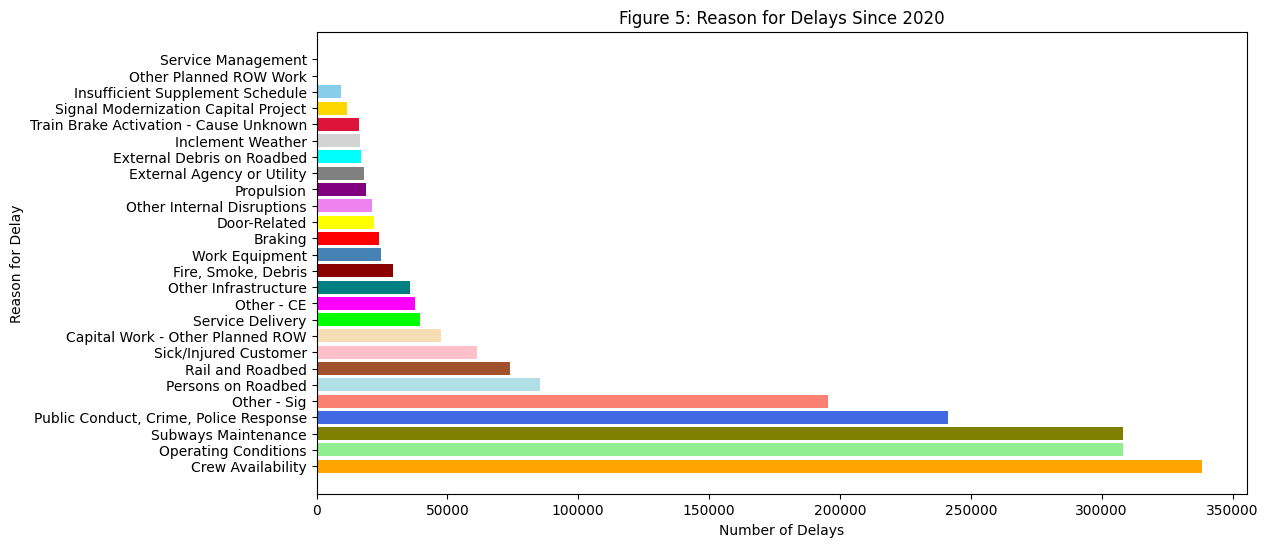

In [74]:
# group by delay category
df_subcategory = df.groupby('subcategory').sum().reset_index()

#sort by delays
df_subcategory = df_subcategory.sort_values('delays', ascending=False)

# create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(df_subcategory['subcategory'], df_subcategory['delays'], color=[category_colors.get(cat, 'black') for cat in df_subcategory['subcategory']])
ax.set_xlabel('Number of Delays')
ax.set_ylabel('Reason for Delay')

plt.title(get_figure_label() + ": Reason for Delays Since 2020")


# Group the rows based on their delay subcategory and line, and create a stacked bar chart

In [75]:
# pivot the delay subcategory rows into columns
df_line_grouped = df.copy()
df_line_grouped = df_line_grouped.pivot(index=['month', 'day_type', 'line'], columns='subcategory', values='delays').fillna(0)
df_line_grouped['total_delays'] = df_line_grouped.sum(axis=1)

# sum the delays
df_line_grouped = df_line_grouped.groupby(['line']).sum().reset_index()

# sort by delays
df_line_grouped = df_line_grouped.sort_values('total_delays', ascending=False)
df_line_grouped.set_index('line', inplace=True)

#drop total_delays now
df_line_grouped = df_line_grouped.drop(columns=['total_delays'])


Text(0.5, 0, 'Subway Line')

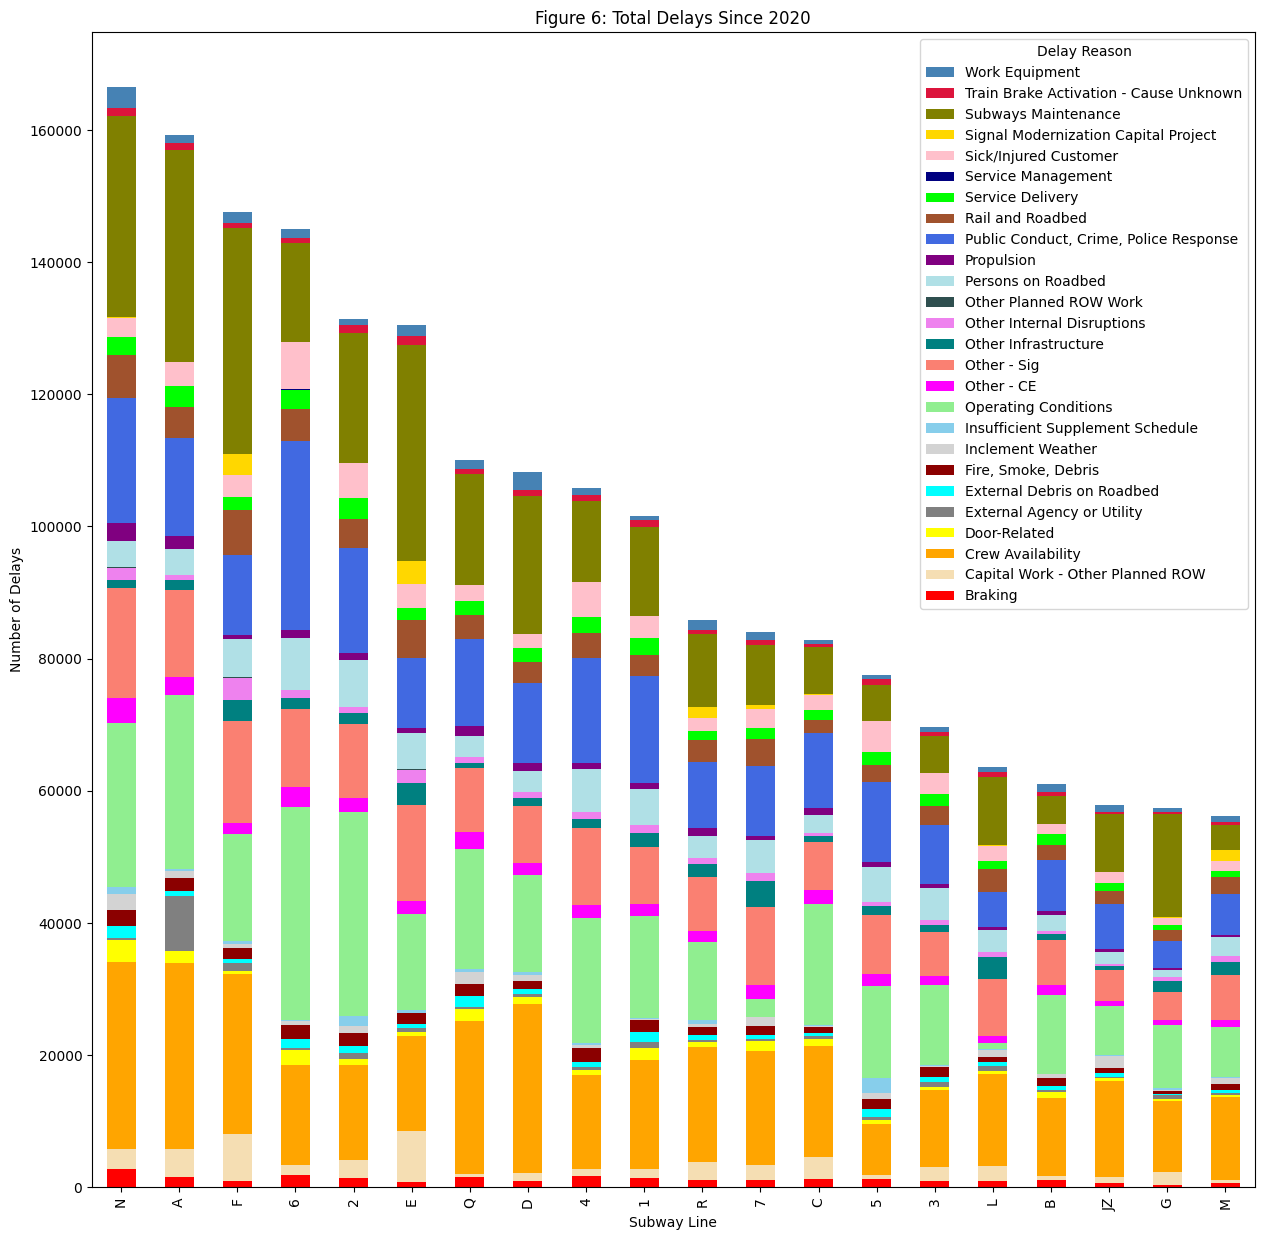

In [76]:
# Plot a stacked bargraph
fig, ax = plt.subplots(figsize=(15, 15))

df_line_grouped.plot(kind='bar', stacked=True, ax=ax, color=[category_colors[col] for col in df_line_grouped.columns])

# reverse the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Delay Reason")

plt.title(get_figure_label() + ": Total Delays Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Subway Line")

# Group the data by their month, sum the delays, and create a line chart

Text(0.5, 0, 'Date')

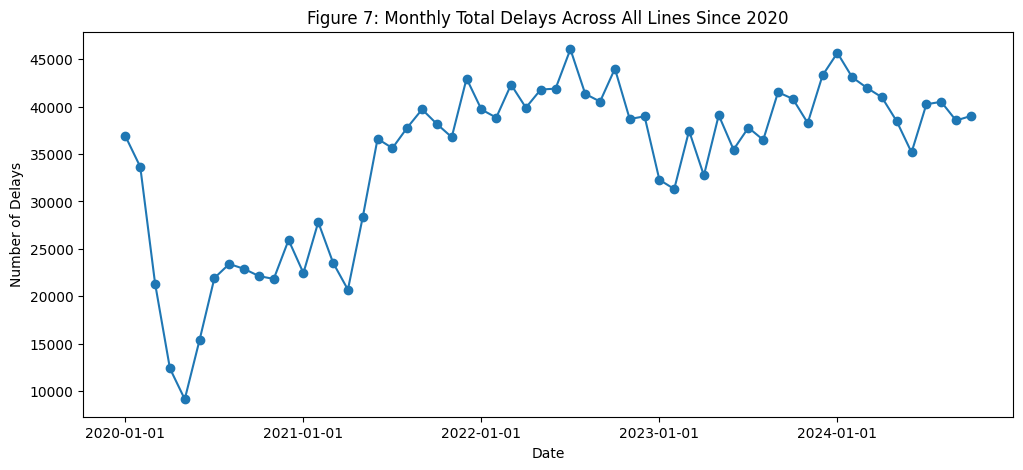

In [77]:
# group by month
df_monthly = df.groupby(['month']).sum()

# only keep month and delays
df_monthly = df_monthly[['delays']]

# plot the monthly delays
plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index, df_monthly['delays'], marker='o')

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(df_monthly.index), 12), df_monthly.index[::12])

plt.title(get_figure_label() + ": Monthly Total Delays Across All Lines Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")

# Group the data by their month and line, sum the delays within the line, and create a line chart

Text(0.5, 0, 'Date')

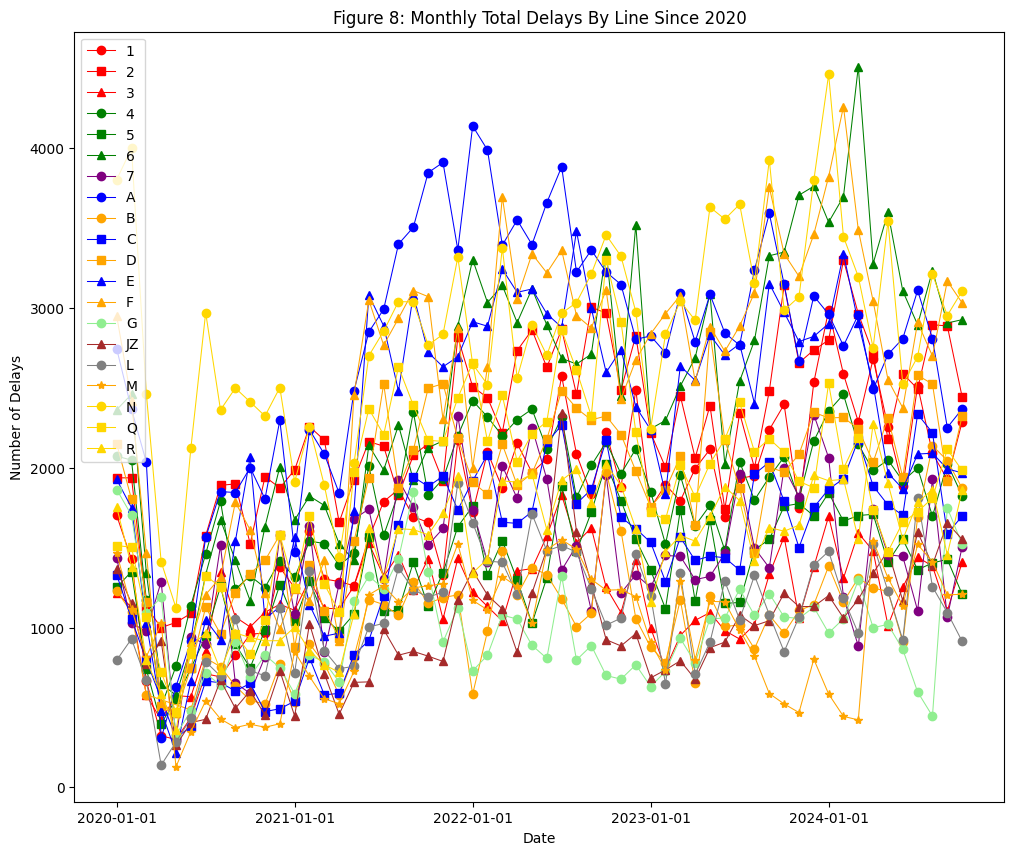

In [78]:
# plot each line's individual delays over time
plt.figure(figsize=(12, 10))

for line in df['line'].unique():
    line_df = df[df['line'] == line]
    df_monthly = line_df.groupby('month').sum()
    plt.plot(
        df_monthly.index, 
        df_monthly['delays'], 
        label=line, 
        marker=line_colors_shapes[line].shape, 
        color=line_colors_shapes[line].color,
        linewidth=0.75
    )

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(df_monthly.index), 12), df_monthly.index[::12])

plt.legend(loc='upper left')
plt.title(get_figure_label() + ": Monthly Total Delays By Line Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")


# Plot each delay subcategory's count over time

Text(0.5, 0, 'Date')

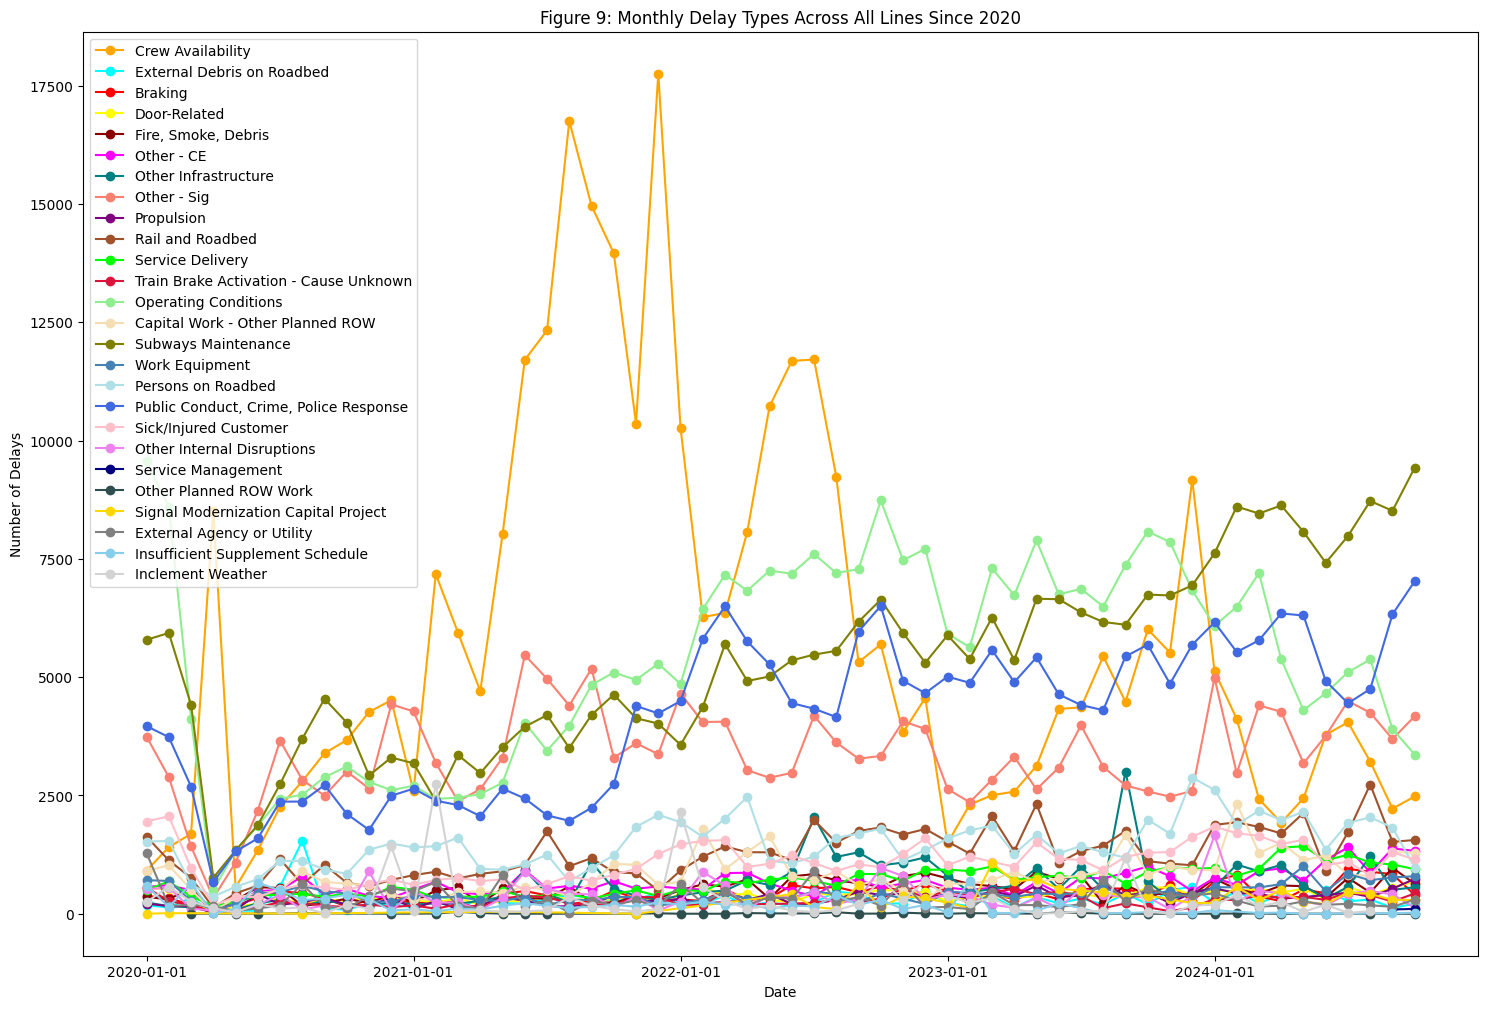

In [79]:
# plot each delay type
plt.figure(figsize=(18, 12))
for delay_type in df['subcategory'].unique():
    df_delay_type = df[df['subcategory'] == delay_type].groupby(['month']).sum()
    plt.plot(
        df_delay_type.index, 
        df_delay_type['delays'], 
        marker='o',
        label=delay_type,
        color=category_colors[delay_type],
    )



# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(df_monthly.index), 12), df_monthly.index[::12])

plt.legend()
plt.title(get_figure_label() + ": Monthly Delay Types Across All Lines Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")


# Plot the metrics over time

Text(0.5, 1.0, 'Figure 10: Average Line Metrics Over Time Since 2020')

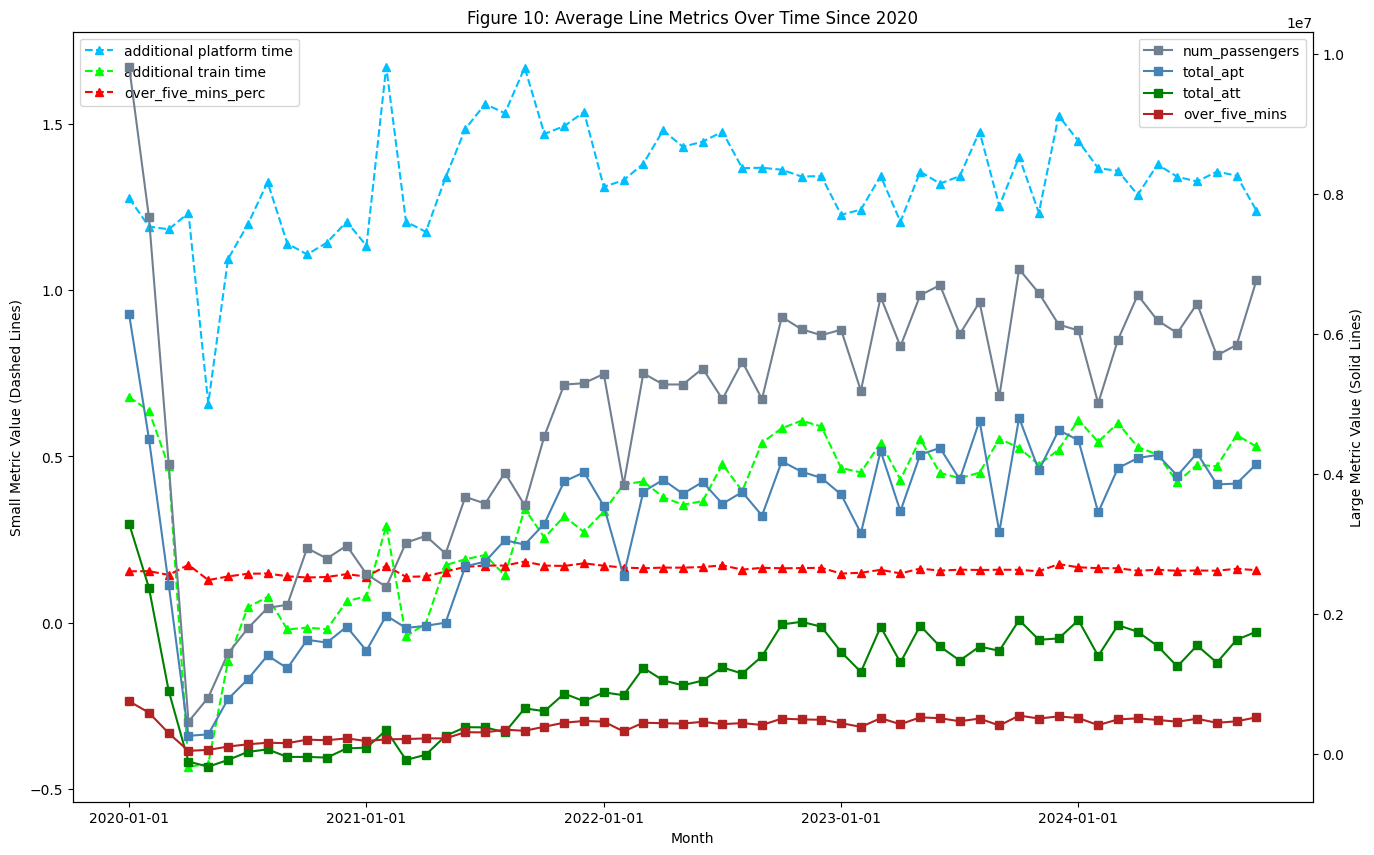

In [80]:
# combine lines
df_avg_lines_metrics = df_metrics.groupby(['month']).mean(numeric_only=True).reset_index()
df_avg_lines_metrics = df_avg_lines_metrics.set_index('month')

# plot
fig, ax_small = plt.subplots(figsize=(16, 10))

ax_large = ax_small.twinx()
# split into two graphs for big values and small
large_cols = ["num_passengers", "total_apt", "total_att", "over_five_mins"]
for col in df_avg_lines_metrics.columns:
    if col in large_cols:
        ax_large.plot(df_avg_lines_metrics.index, df_avg_lines_metrics[col], label=col, color=metric_colors.get(col), marker='s')
    else:
        ax_small.plot(df_avg_lines_metrics.index, df_avg_lines_metrics[col], label=col, color=metric_colors.get(col), linestyle='dashed', marker='^')

ax_small.set_xlabel('Month')
ax_small.set_ylabel('Small Metric Value (Dashed Lines)')
ax_small.legend(loc='upper left')

ax_large.set_xlabel('Month')
ax_large.set_ylabel('Large Metric Value (Solid Lines)')
ax_large.legend(loc='upper right')

ax_small.set_xticks(np.arange(0, len(df_avg_lines_metrics.index), 12), df_avg_lines_metrics.index[::12])
ax_large.set_xticks(np.arange(0, len(df_avg_lines_metrics.index), 12), df_avg_lines_metrics.index[::12])

plt.title(get_figure_label() + ": Average Line Metrics Over Time Since 2020")



# Split between lines for total_apt + total_att

Text(0.5, 0, 'Date')

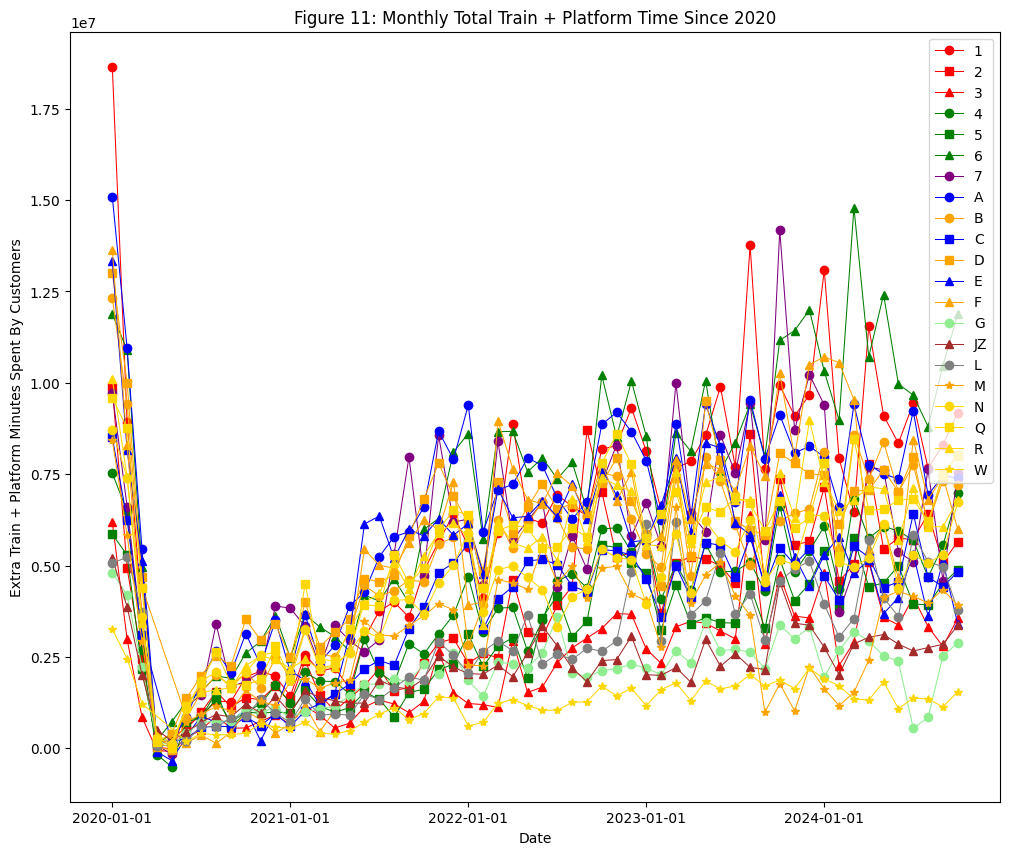

In [81]:
# Split between lines for total_apt + total_att
df_total_add_lines = df_metrics.groupby(['month', 'line']).sum().reset_index()
df_total_add_lines = df_total_add_lines.set_index('month')

plt.figure(figsize=(12, 10))

for line in df_total_add_lines['line'].unique():
    plt.plot(
        df_total_add_lines[df_total_add_lines['line'] == line].index, 
        df_total_add_lines[df_total_add_lines['line'] == line]['total_apt'] + df_total_add_lines[df_total_add_lines['line'] == line]['total_att'], 
        label=line, 
        marker=line_colors_shapes[line].shape, 
        color=line_colors_shapes[line].color,
        linewidth=0.75
    )

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(df_monthly.index), 12), df_monthly.index[::12])

plt.legend(loc='upper right')
plt.title(get_figure_label() + ": Monthly Total Train + Platform Time Since 2020")
plt.ylabel("Extra Train + Platform Minutes Spent By Customers")
plt.xlabel("Date")
